<a href="https://colab.research.google.com/github/navaneeth1228/Deep-Learning/blob/main/Deep_Feed_Forward_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"

--2022-06-12 14:12:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4738776 (4.5M) [application/x-httpd-php]
Saving to: ‘DryBeanDataset.zip’

DryBeanDataset.zip  100%[===================>]   4.52M  3.64MB/s    in 1.2s    

2022-06-12 14:12:39 (3.64 MB/s) - ‘DryBeanDataset.zip’ saved [4738776/4738776]



In [3]:
!unzip "DryBeanDataset.zip"

Archive:  DryBeanDataset.zip
   creating: DryBeanDataset/
  inflating: DryBeanDataset/Dry_Bean_Dataset.arff  
  inflating: DryBeanDataset/Dry_Bean_Dataset.txt  
  inflating: DryBeanDataset/Dry_Bean_Dataset.xlsx  


In [4]:
df=pd.read_excel("/content/DryBeanDataset/Dry_Bean_Dataset.xlsx")

In [5]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [7]:
df=df.sample(frac=1)

In [8]:
y=pd.get_dummies(df["Class"])
y

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
2849,1,0,0,0,0,0,0
5511,0,0,0,0,1,0,0
5299,0,0,1,0,0,0,0
401,0,0,0,0,0,1,0
6634,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
12709,0,0,0,1,0,0,0
11079,0,0,0,1,0,0,0
12149,0,0,0,1,0,0,0
9860,0,0,0,0,0,0,1


In [9]:
x=df.drop("Class",axis=1)
x

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
2849,72379,1060.571,348.129128,266.753476,1.305059,0.642544,73840,303.571746,0.806361,0.980214,0.808617,0.872009,0.004810,0.001716,0.760400,0.992367
5511,34196,690.131,264.929595,165.788088,1.598001,0.779998,34639,208.661687,0.751560,0.987211,0.902240,0.787612,0.007747,0.001839,0.620332,0.991292
5299,86338,1143.590,447.340553,247.246735,1.809288,0.833378,87277,331.555359,0.717474,0.989241,0.829605,0.741170,0.005181,0.000964,0.549333,0.993901
401,35734,700.162,249.469799,182.915041,1.363856,0.679997,36085,213.302466,0.766495,0.990273,0.915998,0.855023,0.006981,0.002302,0.731065,0.997067
6634,55175,962.440,408.276852,173.125447,2.358272,0.905644,55785,265.049037,0.737042,0.989065,0.748523,0.649189,0.007400,0.000811,0.421447,0.993887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12709,35494,689.381,253.049062,179.026992,1.413469,0.706734,35815,212.584958,0.720208,0.991037,0.938526,0.840094,0.007129,0.002190,0.705758,0.997566
11079,29085,637.800,234.328941,158.718287,1.476383,0.735678,29566,192.437450,0.713532,0.983731,0.898483,0.821228,0.008057,0.002260,0.674415,0.995695
12149,33172,673.649,255.173500,166.002775,1.537164,0.759465,33489,205.513752,0.762294,0.990534,0.918574,0.805388,0.007692,0.001996,0.648650,0.997082
9860,51285,856.939,327.818822,199.854804,1.640285,0.792671,51856,255.534910,0.738317,0.988989,0.877608,0.779500,0.006392,0.001456,0.607621,0.996671


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test =  train_test_split(
    x,y,test_size=0.2,random_state=42)

x_train,x_valid,y_train,y_valid = train_test_split(
    x_train,y_train,train_size=0.9
)

In [12]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)
x_valid = scalar.fit_transform(x_valid)

In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((x_valid,y_valid)).batch(32)

In [14]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(64,activation='relu'),
                             tf.keras.layers.Dense(32,activation='relu'),
                             tf.keras.layers.Dense(16,activation='relu'),
                             tf.keras.layers.Dense(8,activation='relu'),
                             tf.keras.layers.Dense(7,activation='softmax')
])

In [15]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [16]:
model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"]
              )

In [17]:
history = model.fit(train_dataset,validation_data= val_dataset, epochs=100)

Epoch 1/100
307/307 [==============================] - 4s 3ms/step - loss: 0.7908 - accuracy: 0.7371 - val_loss: 0.3255 - val_accuracy: 0.8953
Epoch 2/100
307/307 [==============================] - 1s 3ms/step - loss: 0.2631 - accuracy: 0.9157 - val_loss: 0.2622 - val_accuracy: 0.9118
Epoch 3/100
307/307 [==============================] - 1s 3ms/step - loss: 0.2320 - accuracy: 0.9222 - val_loss: 0.2481 - val_accuracy: 0.9118
Epoch 4/100
307/307 [==============================] - 1s 3ms/step - loss: 0.2200 - accuracy: 0.9248 - val_loss: 0.2406 - val_accuracy: 0.9137
Epoch 5/100
307/307 [==============================] - 1s 3ms/step - loss: 0.2131 - accuracy: 0.9265 - val_loss: 0.2364 - val_accuracy: 0.9146
Epoch 6/100
307/307 [==============================] - 1s 3ms/step - loss: 0.2084 - accuracy: 0.9269 - val_loss: 0.2342 - val_accuracy: 0.9137
Epoch 7/100
307/307 [==============================] - 1s 3ms/step - loss: 0.2048 - accuracy: 0.9271 - val_loss: 0.2310 - val_accuracy: 0.9137

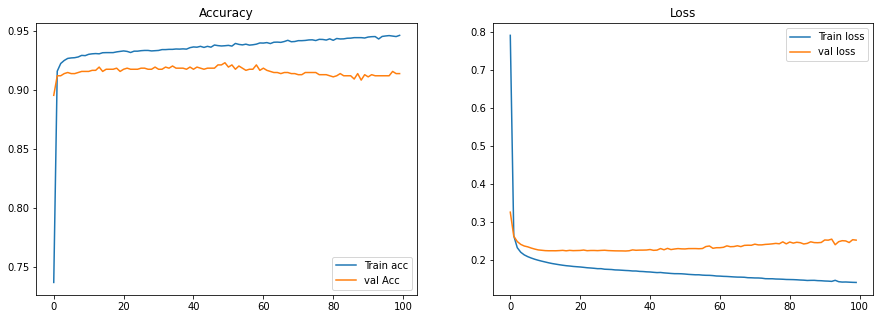

In [18]:
history=history.history
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Accuracy")
plt.plot(history['accuracy'],label='Train acc')
plt.plot(history['val_accuracy'],label='val Acc')
plt.legend()
plt.subplot(122)
plt.title("Loss")
plt.plot(history['loss'],label='Train loss')
plt.plot(history['val_loss'],label='val loss')
plt.legend()
plt.show()
